In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
def frange(start, stop, step):
    i = start
    while i < stop:
        step += step/2
        yield i
        i += step

explode = tuple((i for i in frange(0, 20, 0.01)))

In [3]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

df['DATA_PRELIEVO'] = pd.to_datetime(df['DATA_PRELIEVO'])
df['DATA_ULTIMA_MESTRUAZIONE'] = pd.to_datetime(df['DATA_ULTIMA_MESTRUAZIONE'])
df['DATA_PAP_PRECEDENTE'] = pd.to_datetime(df['DATA_PAP_PRECEDENTE'])

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,ETA_PRELIEVO,DATA_PRELIEVO,DATA_ULTIMA_MESTRUAZIONE,DATA_PAP_PRECEDENTE,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,...,CITO_PREC,VIRALE_PREC,BATT_PREC,CONTROLLO,CTRL_ISTOLOGICO,VALIDITA_CAMPIONE,CAUSA_CAMPIONE_NON_VALIDO,BATT,CITO,VIRALE
0,54,2018-04-01,NaT,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
1,49,2015-11-01,2015-10-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,CANDIDA,NEGATIVO,NaN
2,45,2015-07-01,2015-06-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,ASCUS,NaN
3,66,2016-04-01,NaT,2012-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
4,41,2016-03-01,2016-02-01,2013-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,12.0,NaN,ADEGUATO,NaN,DODERLEIN,NEGATIVO,NaN
5,24,2016-05-01,2016-04-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
6,29,2016-06-01,2016-05-01,NaT,False,True,True,False,False,True,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
7,27,2016-04-01,2016-03-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
8,55,2016-06-01,NaT,2016-01-01,False,True,True,False,False,False,...,NEGATIVO,HPV,NaN,12.0,NaN,NaN,NaN,COCCHI,NEGATIVO,NaN
9,33,2015-03-01,2015-02-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN


In [4]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [5]:
df['ETA_PRELIEVO'].describe()

count    8804.000000
mean       42.579396
std        12.502984
min        12.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: ETA_PRELIEVO, dtype: float64

In [6]:
ETA_PRELIEVO = df.groupby('ETA_PRELIEVO')['ETA_PRELIEVO'].count()
print(ETA_PRELIEVO)

ETA_PRELIEVO
12      1
13      2
14      1
16      4
17      4
18     13
19     32
20     59
21     83
22    121
23    111
24    134
25    142
26    145
27    170
28    161
29    203
30    221
31    219
32    226
33    237
34    235
35    265
36    269
37    258
38    250
39    235
40    250
41    229
42    261
     ... 
58    120
59     90
60     84
61     86
62     71
63     79
64     62
65     49
66     54
67     51
68     41
69     43
70     42
71     37
72     34
73     26
74     18
75      9
76     22
77     19
78      8
79      4
80      5
81      2
82      2
83      3
84      3
85      4
87      1
88      1
Name: ETA_PRELIEVO, Length: 75, dtype: int64


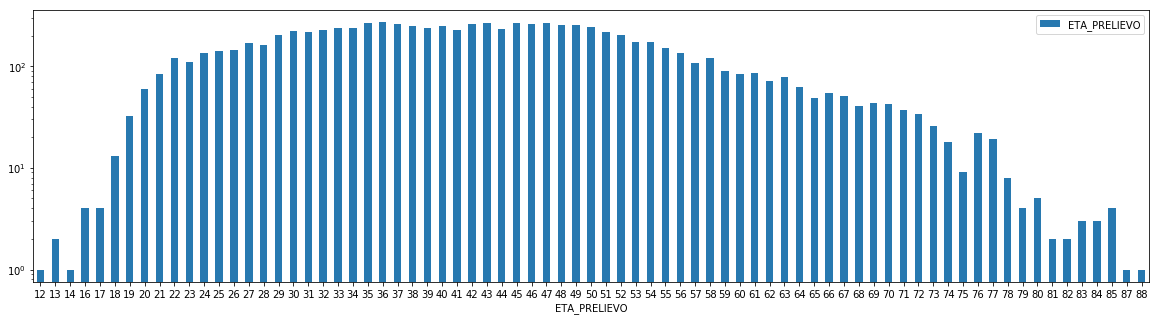

In [7]:
ETA_PRELIEVO.plot(kind='bar', figsize=(20,5), rot=0, legend=True, color='#2879b0', logy=True)

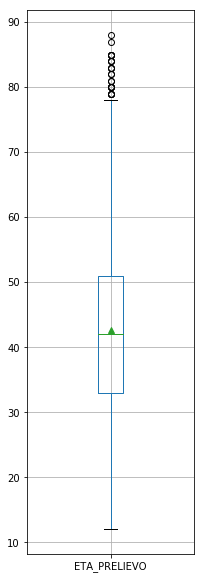

In [8]:
df.boxplot('ETA_PRELIEVO', figsize=(3,10), showmeans=True, rot=0)

In [9]:
df['DATA_PRELIEVO'].describe()

count                    8802
unique                     69
top       2014-09-01 00:00:00
freq                      220
first     2007-11-01 00:00:00
last      2018-04-01 00:00:00
Name: DATA_PRELIEVO, dtype: object

In [10]:
DATA_PRELIEVO = df['DATA_PRELIEVO'].groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO')]).count()
DATA_PRELIEVO.index = DATA_PRELIEVO.index.astype('int64')
print(DATA_PRELIEVO)

ANNO
2007       3
2010       1
2012      13
2013    1428
2014    1972
2015    1801
2016    1702
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64


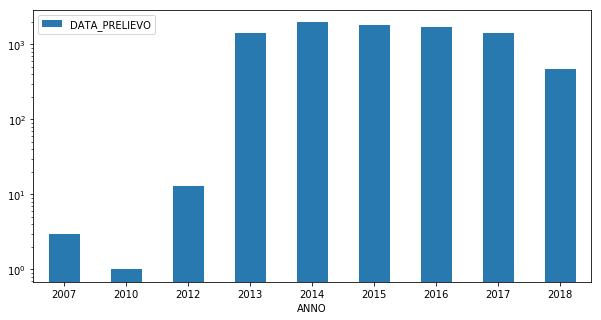

In [11]:
DATA_PRELIEVO.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

In [12]:
DATA_PRELIEVO_PIE = DATA_PRELIEVO.sort_values(ascending=False)[:6]
DATA_PRELIEVO_PIE

ANNO
2014    1972
2015    1801
2016    1702
2013    1428
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64

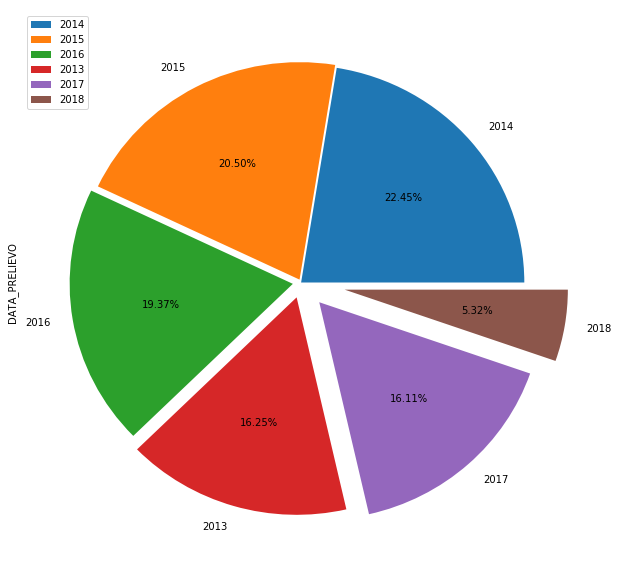

In [13]:
DATA_PRELIEVO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                   explode = explode[:len(DATA_PRELIEVO_PIE)],\
                   
                   autopct='%1.2f%%', startangle=0)

In [14]:
DATA_PRELIEVO_YM = df['DATA_PRELIEVO']\
                        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO'), df["DATA_PRELIEVO"].dt.month.rename('MESE')])\
                        .count()

DATA_PRELIEVO_YM.index = pd.MultiIndex.from_tuples([(int(ix[0]), int(ix[1])) for ix in DATA_PRELIEVO_YM.index.tolist()])

print(DATA_PRELIEVO_YM)

2007  11      3
2010  4       1
2012  3       1
      11      2
      12     10
2013  1      30
      2      28
      3       3
      4     114
      5     189
      6     159
      7     146
      8      98
      9     152
      10    195
      11    156
      12    158
2014  1     136
      2     164
      3     196
      4     171
      5     180
      6     142
      7     155
      8     114
      9     220
      10    183
      11    166
      12    145
2015  1     144
           ... 
      11    143
      12    101
2016  1     138
      2     135
      3     155
      4     148
      5     217
      6     155
      7     108
      8      89
      9     177
      10    159
      11    140
      12     81
2017  1      71
      2     112
      3     139
      4      90
      5     128
      6      84
      7     128
      8     123
      9     133
      10    183
      11    142
      12     82
2018  1     156
      2     131
      3     163
      4      17
Name: DATA_PRELIEVO, Len

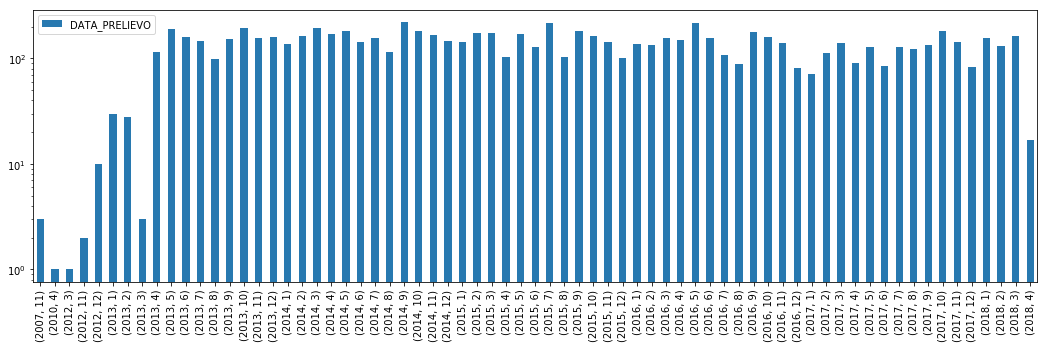

In [15]:
DATA_PRELIEVO_YM.plot(kind='bar', figsize=(18,5), rot=90, legend=True, color='#2879b0', logy=True)

In [16]:
df['GRAVIDANZE'].describe()

count    2872.000000
mean        1.755919
std         0.722312
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

In [17]:
GRAVIDANZE = df.groupby('GRAVIDANZE')['GRAVIDANZE'].count()
GRAVIDANZE.index = GRAVIDANZE.index.astype('int64')
print(GRAVIDANZE)

GRAVIDANZE
0       2
1    1076
2    1484
3     262
4      36
5       6
6       4
7       1
8       1
Name: GRAVIDANZE, dtype: int64


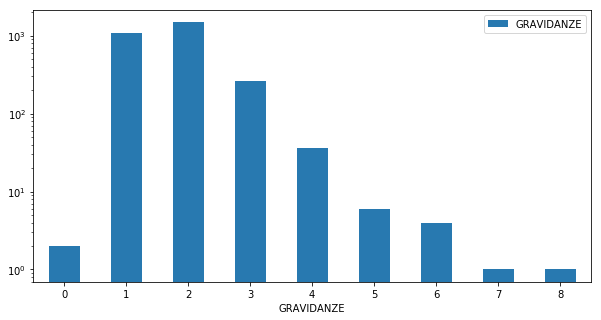

In [18]:
GRAVIDANZE.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

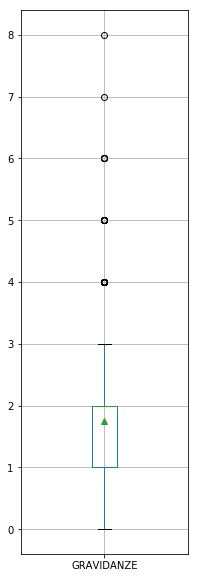

In [19]:
df.boxplot('GRAVIDANZE', figsize=(3,10), showmeans=True, rot=0)

In [20]:
GRAVIDANZE_PIE = GRAVIDANZE.sort_values(ascending=False)[:4]
GRAVIDANZE_PIE

GRAVIDANZE
2    1484
1    1076
3     262
4      36
Name: GRAVIDANZE, dtype: int64

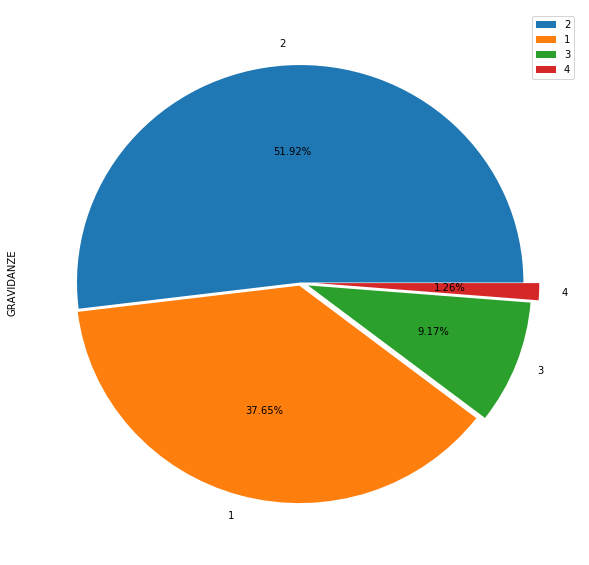

In [21]:
GRAVIDANZE_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                    explode = explode[:len(GRAVIDANZE_PIE)],\
                    autopct='%1.2f%%', startangle=0)

In [22]:
df['ABORTI'].describe()

count    813.000000
mean       1.399754
std        0.808727
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: ABORTI, dtype: float64

In [23]:
ABORTI = df.groupby('ABORTI')['ABORTI'].count()
ABORTI.index = ABORTI.index.astype('int64')
print(ABORTI)

ABORTI
1    595
2    151
3     42
4     13
5     11
8      1
Name: ABORTI, dtype: int64


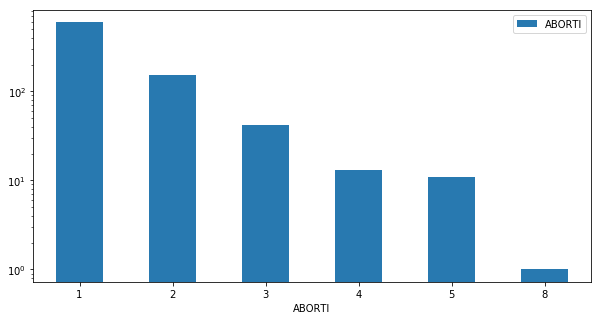

In [24]:
ABORTI.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

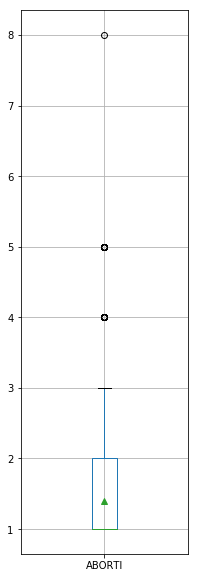

In [25]:
df.boxplot('ABORTI', figsize=(3,10), showmeans=True, rot=0)

In [26]:
ABORTI_PIE = ABORTI.sort_values(ascending=False)[:5]
ABORTI_PIE

ABORTI
1    595
2    151
3     42
4     13
5     11
Name: ABORTI, dtype: int64

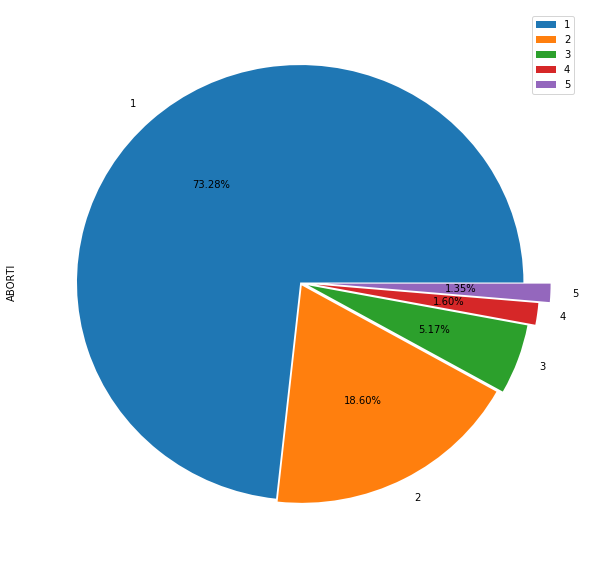

In [27]:
ABORTI_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(ABORTI_PIE)],\
                autopct='%1.2f%%', startangle=0)

In [28]:
df['PRIMO_PAP'].describe()

count     8804
unique       2
top       True
freq      6572
Name: PRIMO_PAP, dtype: object

In [29]:
PRIMO_PAP = df.groupby('PRIMO_PAP')['PRIMO_PAP'].count()
print(PRIMO_PAP)

PRIMO_PAP
False    2232
True     6572
Name: PRIMO_PAP, dtype: int64


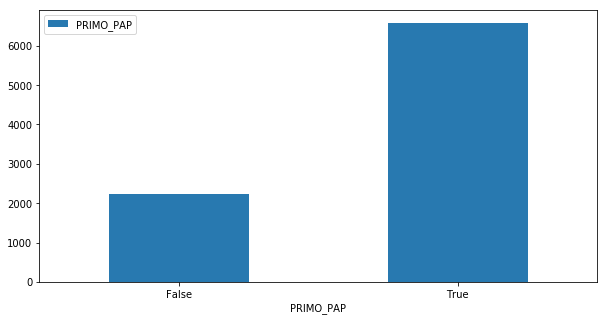

In [30]:
PRIMO_PAP.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0')

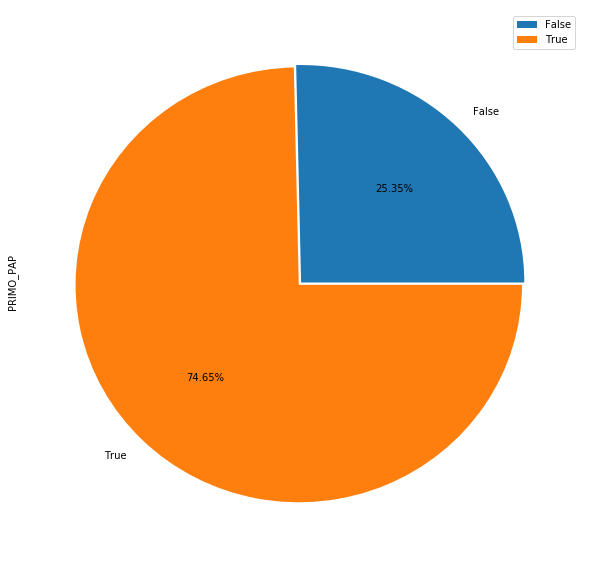

In [31]:
PRIMO_PAP.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(PRIMO_PAP)],\
                autopct='%1.2f%%', startangle=0)

In [32]:
df['CONTROLLO'].describe()

count    8208.000000
mean       11.906433
std         0.747861
min         3.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: CONTROLLO, dtype: float64

In [33]:
CONTROLLO = df.groupby('CONTROLLO')['CONTROLLO'].count()
CONTROLLO.index = CONTROLLO.index.astype('int64')
print(CONTROLLO)

CONTROLLO
3        2
6      125
12    8081
Name: CONTROLLO, dtype: int64


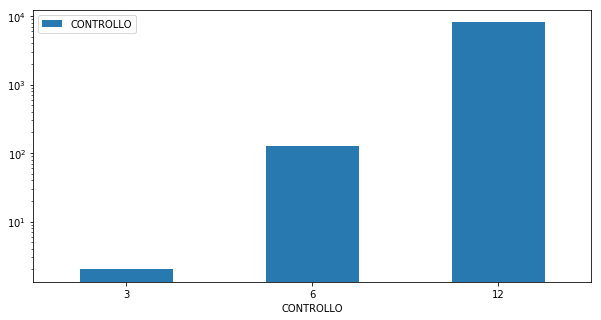

In [34]:
CONTROLLO.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

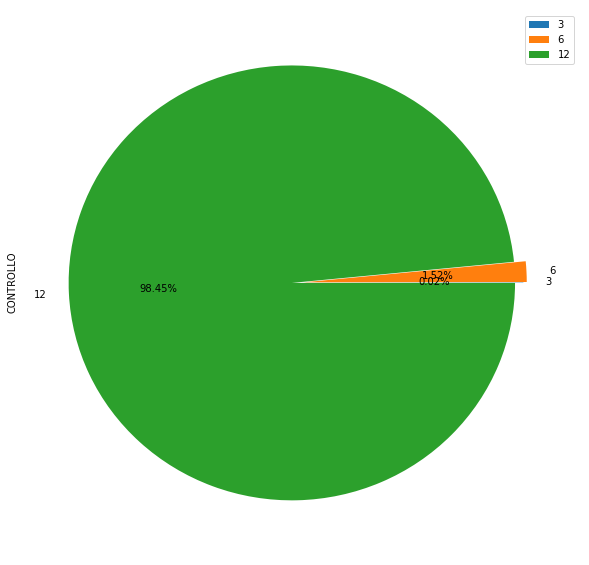

In [35]:
CONTROLLO.sort_values(ascending=False)
CONTROLLO.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(CONTROLLO)],\
                autopct='%1.2f%%', startangle=0)

In [36]:
df['VALIDITA_CAMPIONE'].describe()

count         8654
unique           3
top       ADEGUATO
freq          8624
Name: VALIDITA_CAMPIONE, dtype: object

In [37]:
VALIDITA_CAMPIONE = df.groupby('VALIDITA_CAMPIONE')['VALIDITA_CAMPIONE'].count()
print(VALIDITA_CAMPIONE)

VALIDITA_CAMPIONE
ADEGUATO       8624
INADEGUATO       28
SUBOTTIMALE       2
Name: VALIDITA_CAMPIONE, dtype: int64


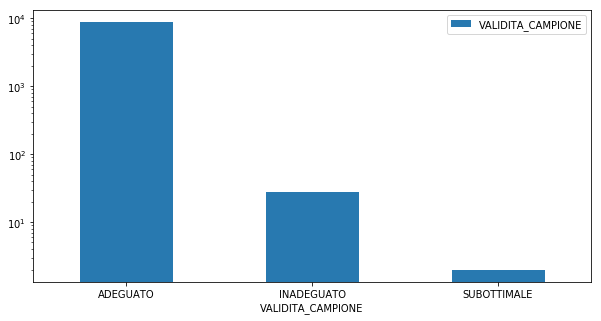

In [38]:
VALIDITA_CAMPIONE.plot(kind='bar', figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

In [39]:
df['BATT'].describe()

count       1015
unique         9
top       COCCHI
freq         325
Name: BATT, dtype: object

In [40]:
BATT = df.groupby('BATT')['BATT'].count()
print(BATT)

BATT
ACTINOMYCES     13
CANDIDA        229
CLAMYDIA         1
COCCHI         325
DODERLEIN      228
FLOGOSI         85
GARDNERELLA      9
TRICHOMONAS      6
VAGINOSI       119
Name: BATT, dtype: int64


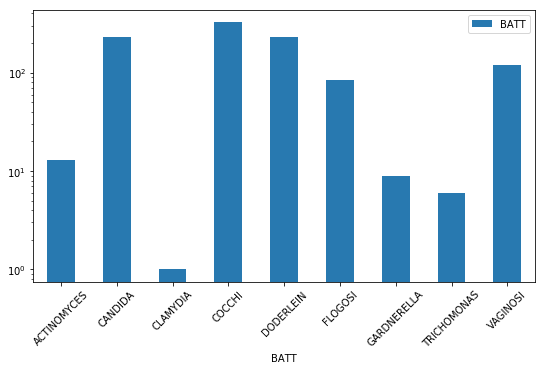

In [41]:
BATT.plot(kind='bar', figsize=(9,5), rot=45, legend=True, color='#2879b0', logy=True)

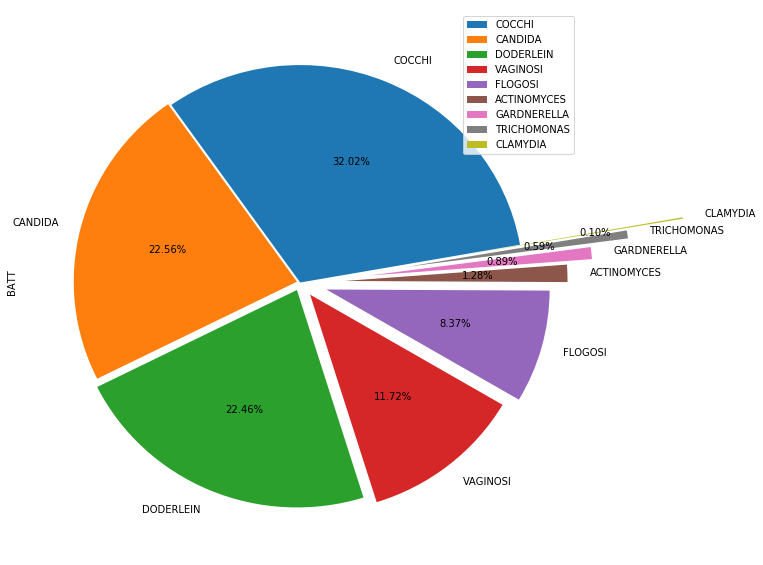

In [42]:
BATT = BATT.sort_values(ascending=False)

BATT.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(BATT)],\
                autopct='%1.2f%%', startangle=10)

In [43]:
df['CITO'].describe()

count         8711
unique           9
top       NEGATIVO
freq          8447
Name: CITO, dtype: object

In [44]:
CITO = df.groupby('CITO')['CITO'].count()
print(CITO)

CITO
AGC-NEOPLASTIC       2
AGC-NOS              6
AIS                  1
ASC-H                2
ASCUS              129
HSIL                17
LSIL               106
NEGATIVO          8447
SCC                  1
Name: CITO, dtype: int64


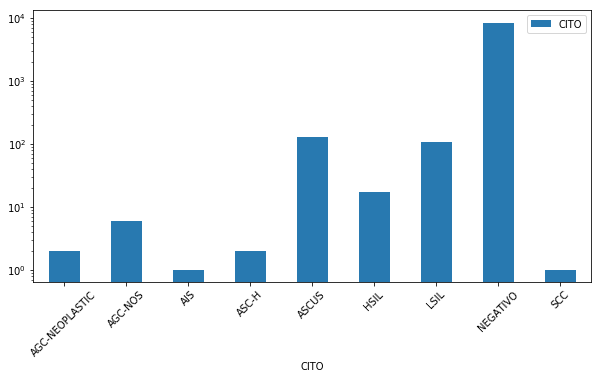

In [45]:
CITO.plot(kind='bar', figsize=(10,5), rot=45, legend=True, color='#2879b0', logy=True)

In [46]:
CITO_PIE = CITO.sort_values(ascending=False)[:4]
CITO_PIE


CITO
NEGATIVO    8447
ASCUS        129
LSIL         106
HSIL          17
Name: CITO, dtype: int64

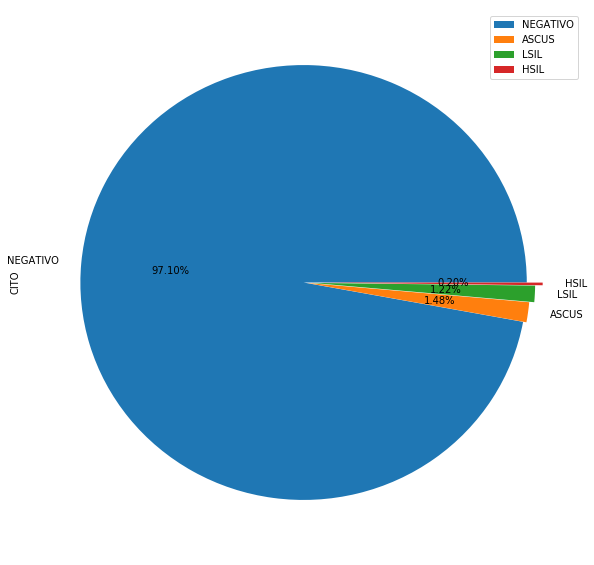

In [47]:
CITO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(CITO_PIE)],\
                autopct='%1.2f%%', startangle=0)

In [48]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [49]:
N_PERDITE_ER = len(df[df['PERDITE_ER'] == True])
N_LEUCORREA = len(df[df['LEUCORREA'] == True])
N_PRURITO = len(df[df['PRURITO'] == True])

SINTOMI = pd.Series({'PERDITE_ER':N_PERDITE_ER,'LEUCORREA':N_LEUCORREA,'PRURITO':N_PRURITO})
SINTOMI.rename('SINTOMI', inplace=True)
print(SINTOMI)

PERDITE_ER     12
LEUCORREA     147
PRURITO         2
Name: SINTOMI, dtype: int64


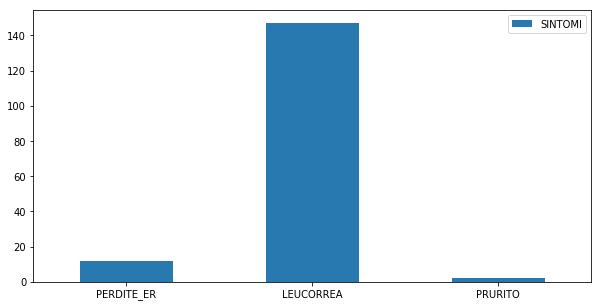

In [50]:
SINTOMI.plot(kind='bar', figsize=(10,5), legend = True, rot=0, color='#2879b0')

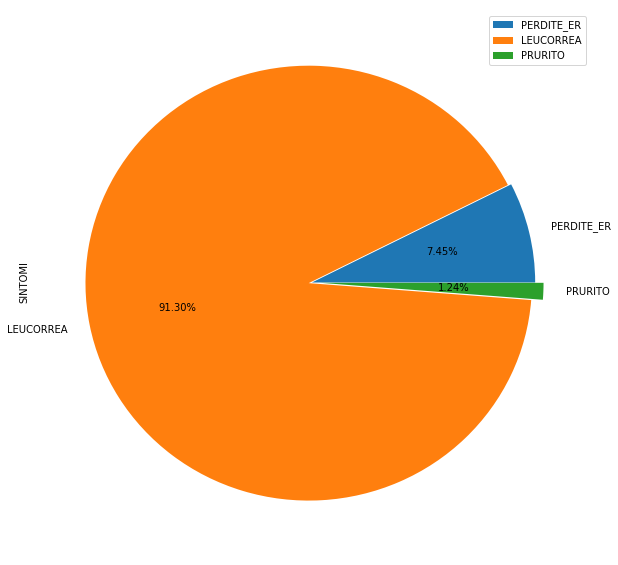

In [51]:
SINTOMI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(SINTOMI)],\
                autopct='%1.2f%%', startangle=0)

In [52]:
N_MENOPAUSA = len(df[df['MENOPAUSA'] == True])
N_AMENORREA = len(df[df['AMENORREA'] == True])
N_POST_PARTUM = len(df[df['POST_PARTUM'] == True])

STATI_FISIOLOGICI = pd.Series({'MENOPAUSA':N_MENOPAUSA,'AMENORREA':N_AMENORREA,'POST_PARTUM':N_POST_PARTUM})
STATI_FISIOLOGICI.rename('STATI_FISIOLOGICI', inplace=True)
print(STATI_FISIOLOGICI)

MENOPAUSA      1116
AMENORREA        39
POST_PARTUM     118
Name: STATI_FISIOLOGICI, dtype: int64


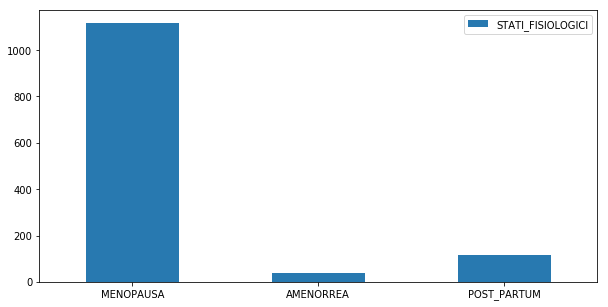

In [53]:
STATI_FISIOLOGICI.plot(kind='bar', legend = True, figsize=(10,5), rot=0, color='#2879b0')

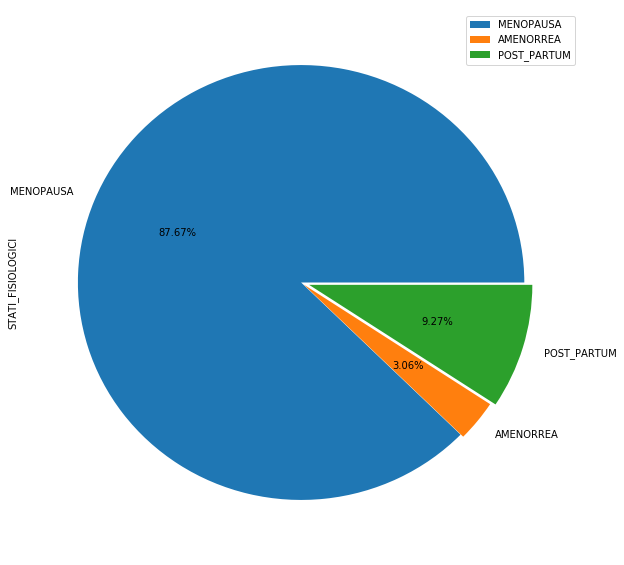

In [54]:
STATI_FISIOLOGICI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(STATI_FISIOLOGICI)],\
                autopct='%1.2f%%', startangle=0)

In [55]:
N_FORNICE = len(df[df['FORNICE'] == True])
N_PORTIO = len(df[df['PORTIO'] == True])
N_CAN_CERV = len(df[df['CAN_CERV'] == True])
N_CAV_UT = len(df[df['CAV_UT'] == True])

TIPO_PRELIEVO = pd.Series({'FORNICE':N_FORNICE,'PORTIO':N_PORTIO,'CAN_CERV':N_CAN_CERV, 'CAV_UT': N_CAV_UT})
TIPO_PRELIEVO.rename('TIPO_PRELIEVO', inplace=True)
print(TIPO_PRELIEVO)

FORNICE        4
PORTIO      8548
CAN_CERV    8537
CAV_UT       134
Name: TIPO_PRELIEVO, dtype: int64


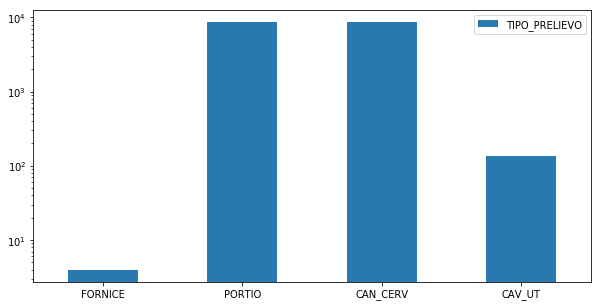

In [56]:
TIPO_PRELIEVO.plot(kind='bar', legend = True, figsize=(10,5), rot=0, color='#2879b0', logy = True)

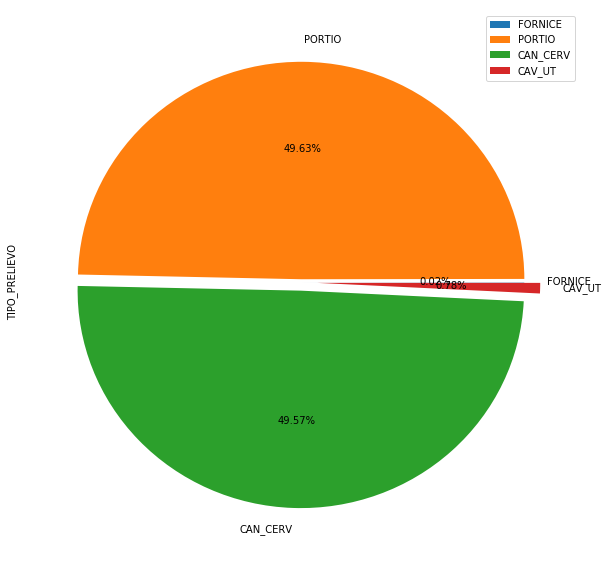

In [57]:
TIPO_PRELIEVO.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(TIPO_PRELIEVO)],\
                autopct='%1.2f%%', startangle=0)

In [58]:
'TER_RAD', 'TER_ORM', 'OP_GIN'
N_TER_RAD = len(df[df['TER_RAD'] == True])
N_TER_ORM = len(df[df['TER_ORM'] == True])
N_OP_GIN = len(df[df['OP_GIN'] == True])

DATI_OBIETTIVI = pd.Series({'TER_RAD':N_TER_RAD,'TER_ORM':N_TER_ORM,'OP_GIN':N_OP_GIN})
DATI_OBIETTIVI.rename('DATI_OBIETTIVI', inplace=True)
print(DATI_OBIETTIVI)

TER_RAD       4
TER_ORM     422
OP_GIN     1408
Name: DATI_OBIETTIVI, dtype: int64


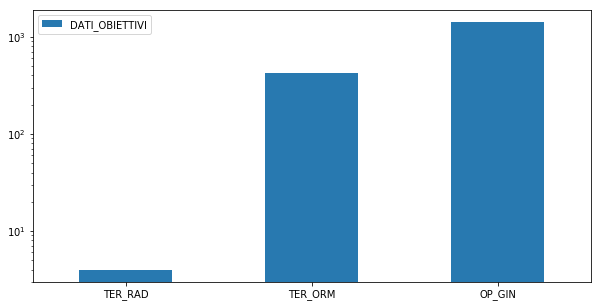

In [59]:
DATI_OBIETTIVI.plot(kind='bar', legend = True, figsize=(10,5), rot=0, color='#2879b0', logy = True)

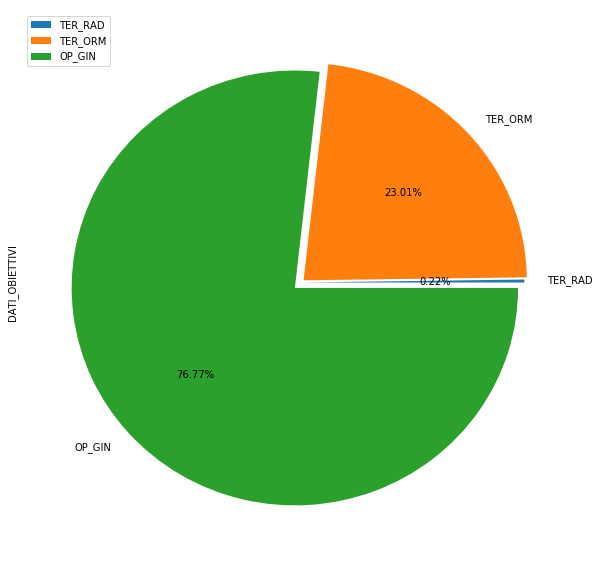

In [60]:
DATI_OBIETTIVI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(DATI_OBIETTIVI)],\
                autopct='%1.2f%%', startangle=0)

In [61]:
N_TEST_ESTR = len(df[df['TEST_ESTR'] == True])
N_TER_ANTIF = len(df[df['TER_ANTIF'] == True])

TEST_CONSIGLIATI = pd.Series({'TEST_ESTR':N_TEST_ESTR,'TER_ANTIF':N_TER_ANTIF})
TEST_CONSIGLIATI.rename('TEST_CONSIGLIATI', inplace=True)
print(TEST_CONSIGLIATI)

TEST_ESTR      4
TER_ANTIF    416
Name: TEST_CONSIGLIATI, dtype: int64


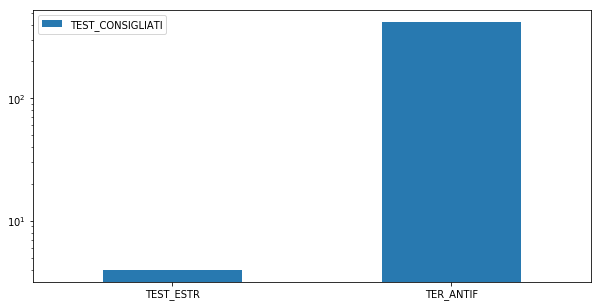

In [62]:
TEST_CONSIGLIATI.plot(kind='bar', legend = True, figsize=(10,5), rot=0, color='#2879b0', logy = True)

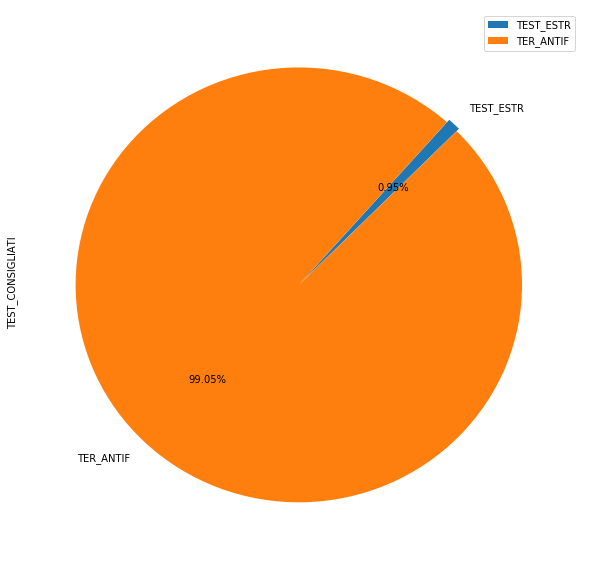

In [63]:
TEST_CONSIGLIATI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(TEST_CONSIGLIATI)],\
                autopct='%1.2f%%', startangle=45)

In [64]:
DELTA_PREL_MESTR = pd.DataFrame({'ID': [i for i in range(8804)], 'DELTA': df['DATA_PRELIEVO'] - df['DATA_ULTIMA_MESTRUAZIONE']})
DELTA_PREL_MESTR.dropna(inplace=True)
DELTA_PREL_MESTR['DELTA'] = DELTA_PREL_MESTR['DELTA'].astype('timedelta64[M]')
DELTA_PREL_MESTR['DELTA'].describe()

count    5075.000000
mean        1.044335
std         6.953461
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       277.000000
Name: DELTA, dtype: float64

In [65]:
DELTA_PREL_MESTR = DELTA_PREL_MESTR.groupby('DELTA')['ID'].count()
DELTA_PREL_MESTR.rename('DELTA (PRELIEVO - ULTIMA MESTR.)', inplace=True)
DELTA_PREL_MESTR.index = DELTA_PREL_MESTR.index.astype('int64')
DELTA_PREL_MESTR

DELTA
0      3313
1      1320
2       191
3        57
4        39
5        27
6        16
7         7
8         7
9        11
10       11
11       10
12        1
13        8
14        5
15        5
16        2
17        4
18        3
19        1
20        1
22        5
23        1
24        2
25        1
27        3
28        1
32        1
33        2
34        4
44        1
45        1
50        1
61        1
65        1
68        1
73        1
82        1
91        1
96        1
97        1
119       2
120       1
206       1
277       1
Name: DELTA (PRELIEVO - ULTIMA MESTR.), dtype: int64

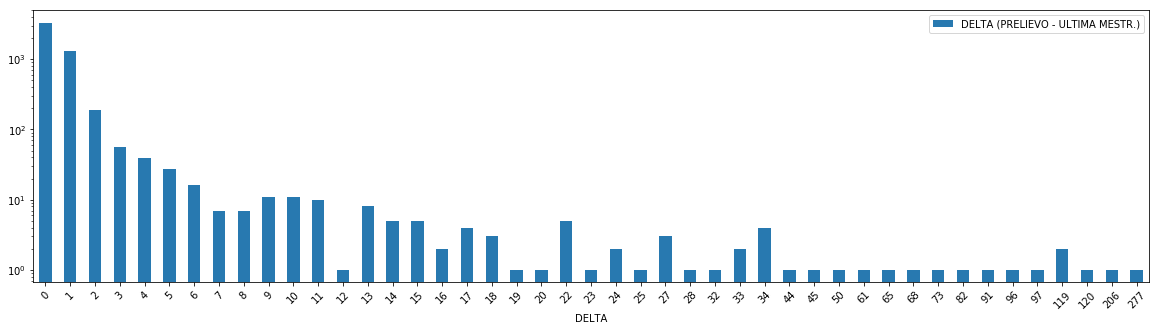

In [66]:
DELTA_PREL_MESTR.plot(kind='bar', figsize=(20,5), legend = True, rot=45, color='#2879b0', logy = True)

In [67]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

In [68]:
df.dtypes

ETA_PRELIEVO                          int64
DATA_PRELIEVO                datetime64[ns]
DATA_ULTIMA_MESTRUAZIONE     datetime64[ns]
DATA_PAP_PRECEDENTE          datetime64[ns]
FORNICE                                bool
PORTIO                                 bool
CAN_CERV                               bool
CAV_UT                                 bool
PERDITE_ER                             bool
LEUCORREA                              bool
PRURITO                                bool
TER_RAD                                bool
TER_ORM                                bool
GRAVIDANZE                          float64
ABORTI                              float64
TEST_ESTR                              bool
TER_ANTIF                              bool
OP_GIN                                 bool
MENOPAUSA                              bool
AMENORREA                              bool
POST_PARTUM                            bool
PRIMO_PAP                              bool
CITO_PREC                       

## Correlation Matrix

In [69]:
correlation_matrix= df.corr()
correlation_matrix

,ETA_PRELIEVO,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,PRURITO,TER_RAD,TER_ORM,GRAVIDANZE,ABORTI,TEST_ESTR,TER_ANTIF,OP_GIN,MENOPAUSA,AMENORREA,POST_PARTUM,PRIMO_PAP,CONTROLLO
ETA_PRELIEVO,1.000000,0.029281,-0.116991,-0.118795,0.152895,0.020943,-0.059997,0.011961,0.028002,-0.093457,0.284171,0.059568,0.008391,-0.066370,0.070919,0.547077,-0.029221,-0.076586,-0.083615,0.025533
FORNICE,0.029281,1.000000,-0.123197,-0.120555,-0.002651,-0.000788,-0.002778,-0.000321,-0.000455,-0.004784,-0.003996,NaN,-0.000455,-0.004748,0.005239,0.039938,-0.001422,-0.002485,0.000173,0.002763
PORTIO,-0.116991,-0.123197,1.000000,0.903655,-0.718381,0.006393,0.011999,0.002609,-0.091476,-0.008636,-0.032617,-0.098534,0.003690,0.003493,-0.125519,-0.078326,0.011544,0.008413,0.004815,0.001965
CAN_CERV,-0.118795,-0.120555,0.903655,1.000000,-0.702975,0.006534,0.007537,0.002666,-0.089474,-0.016129,-0.035884,-0.075580,0.003770,0.001923,-0.119807,-0.083923,0.011797,0.014853,0.003517,0.001030
CAV_UT,0.152895,-0.002651,-0.718381,-0.702975,1.000000,-0.004593,-0.008959,-0.001874,0.084421,-0.019209,0.041301,0.015181,-0.002651,-0.023313,0.158374,0.108793,-0.008293,-0.014490,0.014869,-0.000405
PERDITE_ER,0.020943,-0.000788,0.006393,0.006534,-0.004593,1.000000,0.043240,-0.000557,-0.000788,0.006122,-0.019535,-0.017357,-0.000788,0.006283,-0.016119,0.004431,-0.002464,-0.004306,0.007376,-0.020796
LEUCORREA,-0.059997,-0.002778,0.011999,0.007537,-0.008959,0.043240,1.000000,0.115678,-0.002778,-0.004341,0.007575,0.019490,-0.002778,0.067073,-0.022998,-0.020339,-0.008692,-0.007479,0.010734,0.000214
PRURITO,0.011961,-0.000321,0.002609,0.002666,-0.001874,-0.000557,0.115678,1.000000,-0.000321,-0.003382,-0.009355,NaN,-0.000321,-0.003357,-0.006577,0.016910,-0.001005,-0.001757,-0.008541,0.001953
TER_RAD,0.028002,-0.000455,-0.091476,-0.089474,0.084421,-0.000788,-0.002778,-0.000321,1.000000,0.020167,0.006308,NaN,-0.000455,-0.004748,0.019781,0.039938,-0.001422,-0.002485,-0.012080,0.002763
TER_ORM,-0.093457,-0.004784,-0.008636,-0.016129,-0.019209,0.006122,-0.004341,-0.003382,0.020167,1.000000,0.006752,-0.058744,-0.004784,0.000150,0.015247,-0.040741,-0.014967,-0.026153,0.013427,-0.008979


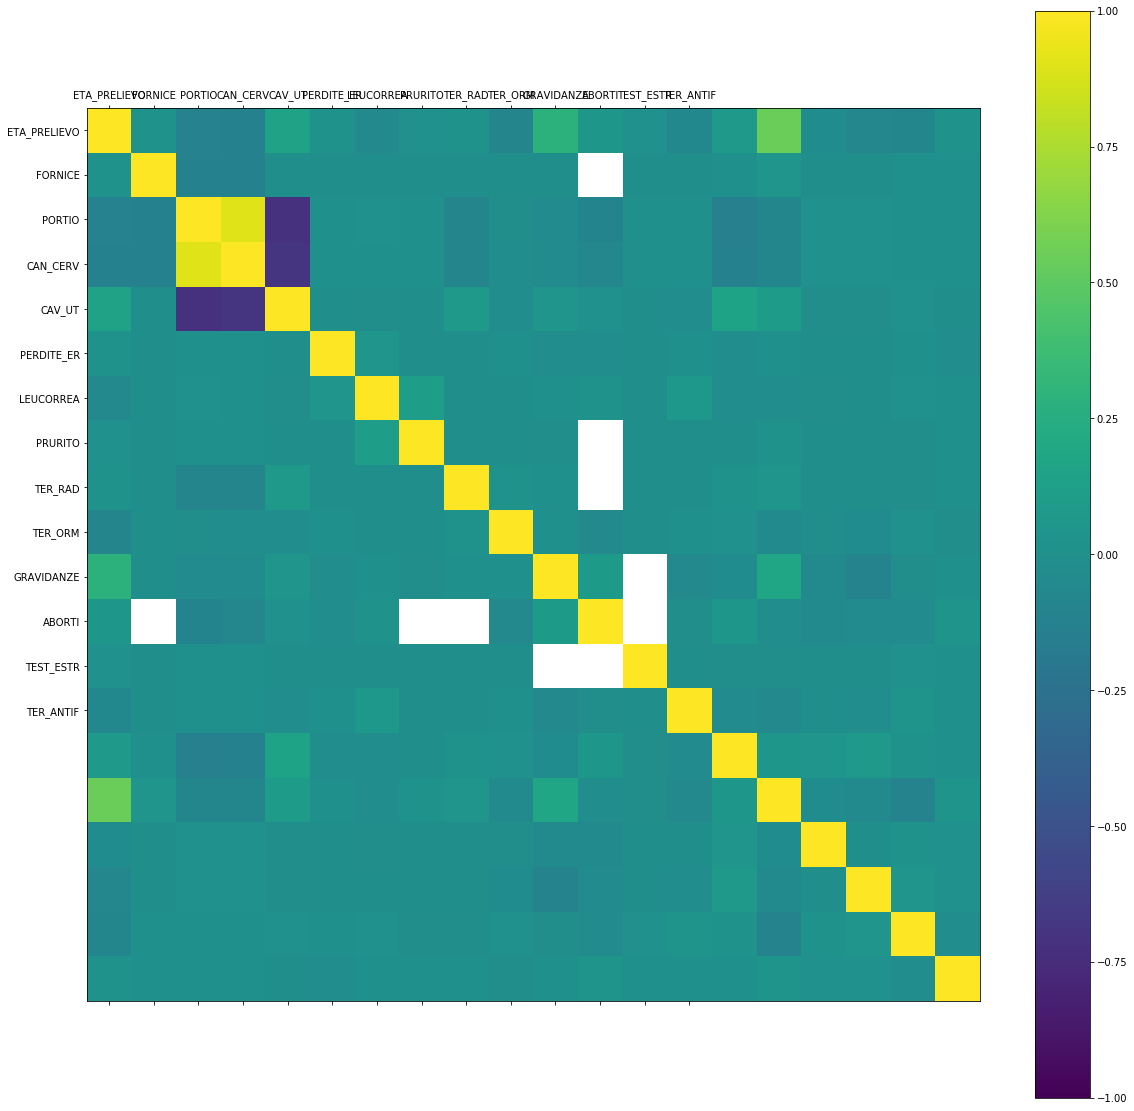

In [70]:
names = list(correlation_matrix.columns)
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [71]:
print(len(df.columns))
print(len(correlation_matrix.columns))
print(set(df.columns) - set(correlation_matrix.columns))

32
20
{'CITO', 'VIRALE_PREC', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE', 'CAUSA_CAMPIONE_NON_VALIDO', 'DATA_PAP_PRECEDENTE', 'BATT', 'VIRALE', 'BATT_PREC', 'CITO_PREC', 'VALIDITA_CAMPIONE', 'CTRL_ISTOLOGICO'}


## Cramer's V
https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [72]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [73]:
cols = ['DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE']

for i in cols:
    for j in cols:
        print('----------------------')
        print(i, j)
        if i == j or len(df[i].dropna()) == 0 or len(df[i].dropna()) == 0:
            continue
        confusion_matrix = pd.crosstab(index=df[i].dropna(), columns=df[j].dropna())
        if confusion_matrix.sum().sum() == 0:
            continue
        v = cramers_v(confusion_matrix)
        
        print(v)
        
        

----------------------
DATA_PRELIEVO DATA_PRELIEVO
----------------------
DATA_PRELIEVO DATA_ULTIMA_MESTRUAZIONE
0.6656827074987467
----------------------
DATA_PRELIEVO DATA_PAP_PRECEDENTE
0.144631625435956
----------------------
DATA_PRELIEVO FORNICE
0.0
----------------------
DATA_PRELIEVO PORTIO
0.01963151437184377
----------------------
DATA_PRELIEVO CAN_CERV
0.0
----------------------
DATA_PRELIEVO CAV_UT
0.0
----------------------
DATA_PRELIEVO PERDITE_ER
0.0
----------------------
DATA_PRELIEVO LEUCORREA
0.06861091423391652
----------------------
DATA_PRELIEVO PRURITO
0.0
----------------------
DATA_PRELIEVO TER_RAD
0.022751070560397883
----------------------
DATA_PRELIEVO TER_ORM
0.06425559940936541
----------------------
DATA_PRELIEVO TEST_ESTR
0.0
----------------------
DATA_PRELIEVO TER_ANTIF
0.11000323946946657
----------------------
DATA_PRELIEVO OP_GIN
0.2100258484693812
----------------------
DATA_PRELIEVO MENOPAUSA
0.19102553609902292
----------------------
DATA_PRELIEV

/anaconda3/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/anaconda3/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


0.05205065761409184
----------------------
DATA_PRELIEVO VIRALE
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE DATA_PRELIEVO
0.6656827074987467
----------------------
DATA_ULTIMA_MESTRUAZIONE DATA_ULTIMA_MESTRUAZIONE
----------------------
DATA_ULTIMA_MESTRUAZIONE DATA_PAP_PRECEDENTE
0.09198936487933618
----------------------
DATA_ULTIMA_MESTRUAZIONE FORNICE
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE PORTIO


/anaconda3/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


0.17104112753419673
----------------------
DATA_ULTIMA_MESTRUAZIONE CAN_CERV
0.19746167504323126
----------------------
DATA_ULTIMA_MESTRUAZIONE CAV_UT
0.6283426123182982
----------------------
DATA_ULTIMA_MESTRUAZIONE PERDITE_ER
0.20169940367116274
----------------------
DATA_ULTIMA_MESTRUAZIONE LEUCORREA
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE PRURITO
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE TER_RAD
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE TER_ORM
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE TEST_ESTR
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE TER_ANTIF
0.07806349749159462
----------------------
DATA_ULTIMA_MESTRUAZIONE OP_GIN
0.07553793149252243
----------------------
DATA_ULTIMA_MESTRUAZIONE MENOPAUSA
0.785198775776291
----------------------
DATA_ULTIMA_MESTRUAZIONE AMENORREA
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE POST_PARTUM
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE PRIMO_PAP
0.13246804743838278
-------------

0.7002285482392884
----------------------
CAV_UT CAV_UT
----------------------
CAV_UT PERDITE_ER
0.0
----------------------
CAV_UT LEUCORREA
0.0
----------------------
CAV_UT PRURITO
0.026871887827561156
----------------------
CAV_UT TER_RAD
0.06174350414111597
----------------------
CAV_UT TER_ORM
0.013292777190100531
----------------------
CAV_UT TEST_ESTR
0.015871532022084137
----------------------
CAV_UT TER_ANTIF
0.018242620305596282
----------------------
CAV_UT OP_GIN
0.15675493808706503
----------------------
CAV_UT MENOPAUSA
0.10687456665374258
----------------------
CAV_UT AMENORREA
0.0
----------------------
CAV_UT POST_PARTUM
0.0
----------------------
CAV_UT PRIMO_PAP
0.008769991927219417
----------------------
CAV_UT CITO_PREC
0.20182401256859428
----------------------
CAV_UT VIRALE_PREC
nan
----------------------
CAV_UT BATT_PREC
nan
----------------------
CAV_UT CTRL_ISTOLOGICO
nan
----------------------
CAV_UT VALIDITA_CAMPIONE
0.057656674633598894
--------------------

0.0
----------------------
TEST_ESTR DATA_ULTIMA_MESTRUAZIONE
0.0
----------------------
TEST_ESTR DATA_PAP_PRECEDENTE
nan
----------------------
TEST_ESTR FORNICE
0.12415264681813028
----------------------
TEST_ESTR PORTIO
0.005877603394610971
----------------------
TEST_ESTR CAN_CERV
0.00499441448882849
----------------------
TEST_ESTR CAV_UT
0.015871532022084137
----------------------
TEST_ESTR PERDITE_ER
0.07065133443524851
----------------------
TEST_ESTR LEUCORREA
0.014531516999158344
----------------------
TEST_ESTR PRURITO
0.17620351539016377
----------------------
TEST_ESTR TER_RAD
0.12415264681813028
----------------------
TEST_ESTR TER_ORM
0.0
----------------------
TEST_ESTR TEST_ESTR
----------------------
TEST_ESTR TER_ANTIF
0.0
----------------------
TEST_ESTR OP_GIN
0.0
----------------------
TEST_ESTR MENOPAUSA
0.0
----------------------
TEST_ESTR AMENORREA
0.03721379599170986
----------------------
TEST_ESTR POST_PARTUM
0.017735093350910953
----------------------
TEST

0.02132672102902767
----------------------
POST_PARTUM TEST_ESTR
0.017735093350910953
----------------------
POST_PARTUM TER_ANTIF
0.015698026436061187
----------------------
POST_PARTUM OP_GIN
0.07096725113124419
----------------------
POST_PARTUM MENOPAUSA
0.041581126492624486
----------------------
POST_PARTUM AMENORREA
0.0
----------------------
POST_PARTUM POST_PARTUM
----------------------
POST_PARTUM PRIMO_PAP
0.042778678441850786
----------------------
POST_PARTUM CITO_PREC
0.0
----------------------
POST_PARTUM VIRALE_PREC
nan
----------------------
POST_PARTUM BATT_PREC
nan
----------------------
POST_PARTUM CTRL_ISTOLOGICO
nan
----------------------
POST_PARTUM VALIDITA_CAMPIONE
0.0
----------------------
POST_PARTUM CAUSA_CAMPIONE_NON_VALIDO
nan
----------------------
POST_PARTUM BATT
0.0
----------------------
POST_PARTUM CITO
0.0
----------------------
POST_PARTUM VIRALE
nan
----------------------
PRIMO_PAP DATA_PRELIEVO
0.26859424663580334
----------------------
PRIMO_PA

0.0
----------------------
VALIDITA_CAMPIONE DATA_ULTIMA_MESTRUAZIONE
0.0
----------------------
VALIDITA_CAMPIONE DATA_PAP_PRECEDENTE
0.21779510143740113
----------------------
VALIDITA_CAMPIONE FORNICE
0.0
----------------------
VALIDITA_CAMPIONE PORTIO
0.036131725706363645
----------------------
VALIDITA_CAMPIONE CAN_CERV
0.034785967000302426
----------------------
VALIDITA_CAMPIONE CAV_UT
0.057656674633598894
----------------------
VALIDITA_CAMPIONE PERDITE_ER
0.0
----------------------
VALIDITA_CAMPIONE LEUCORREA
0.0
----------------------
VALIDITA_CAMPIONE PRURITO
0.0
----------------------
VALIDITA_CAMPIONE TER_RAD
0.0
----------------------
VALIDITA_CAMPIONE TER_ORM
0.028978659422728703
----------------------
VALIDITA_CAMPIONE TEST_ESTR
0.0
----------------------
VALIDITA_CAMPIONE TER_ANTIF
0.0
----------------------
VALIDITA_CAMPIONE OP_GIN
0.0
----------------------
VALIDITA_CAMPIONE MENOPAUSA
0.01595416162858474
----------------------
VALIDITA_CAMPIONE AMENORREA
0.0
--------

## ANOVA 
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [74]:
model = ols('ETA_PRELIEVO ~ DATA_PRELIEVO', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('Eta squared:  ',esq_sm)
print()


                     sum_sq      df         F    PR(>F)
DATA_PRELIEVO  1.932065e+04    69.0  1.802471  0.000055
Residual       1.356805e+06  8734.0       NaN       NaN
Eta squared:   0.014039887210602599



In [75]:
model = ols('DATA_PAP_PRECEDENTE ~ CITO', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('Eta squared:  ',esq_sm)
print()


ValueError: shapes (8711,82) and (8711,82) not aligned: 82 (dim 1) != 8711 (dim 0)